In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ReduceLROnPlateau
from livehistoryplot.callbacks import PlotHistory

import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

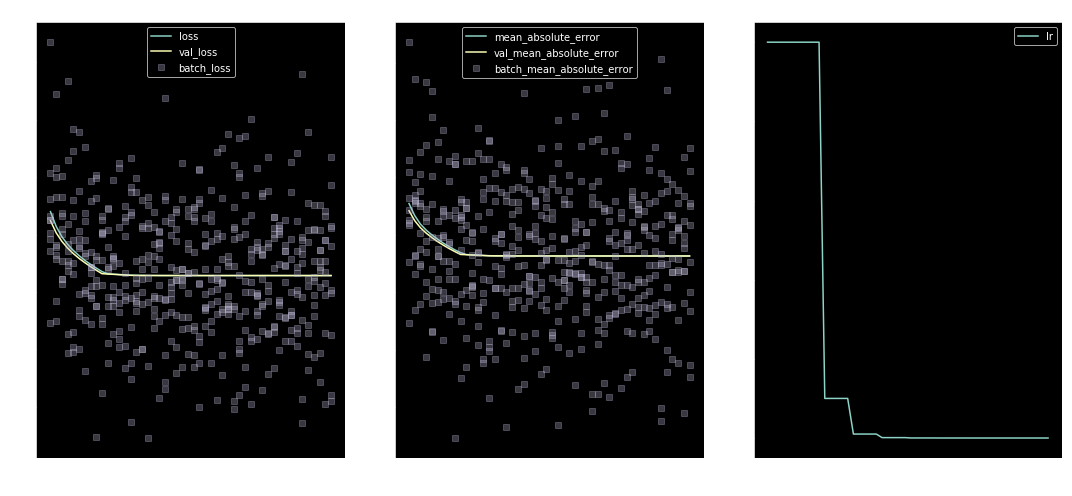

In [46]:
model = Sequential([
    Dense(1, input_shape=(1,))
])
model.compile(loss='mse', optimizer='sgd', metrics=['mae'])

X, y = np.random.rand(2, 500)
X_val, y_val = np.random.rand(2, 100)

lr_callback = ReduceLROnPlateau(monitor='val_loss', patience=5, min_delta=0.01)
plot_history_callback = PlotHistory(batches=True, n_cols=3, figsize=(15, 7))

model.fit(
    X, y, validation_data=(X, y),
    epochs=50,
    batch_size=50,
    callbacks=[
        lr_callback, 
        plot_history_callback
    ],
    verbose=1
)

In [ ]:
plot_history_callback.history